In [11]:
%reload_ext autoreload

%autoreload 2

In [12]:
input_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt"
#input_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_precursor_filename_sampleid.aq_reformat.tsv"

directlfq_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_fragion_isotopes_raw_charite_dataset.protein_intensities.tsv"

samplemap ="../../test_data/system_tests/diann_charite_dataset/samplemap_shortened.tsv"

diann_lfq_file = "../../test_data/system_tests/diann_charite_dataset/Charite-DIA-NN_analysis.txt.diann_gene.aq_reformat.tsv"
iq_lfq_file = "../../test_data/system_tests/diann_charite_dataset/report-charite-iq.tsv"

outfile = "../../test_data/system_tests/diann_charite_dataset/cv_distribution_charite_cohort.pdf"

run_directlfq = True

In [13]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="diann_fragion_isotopes_raw_charite_dataset", min_nonan=2)


using input type diann_fragion_isotopes_raw_charite_dataset
394 prots total
using 10 processes
prot 0
prot 100
prot 200
prot 300


In [14]:

import directlfq.benchmarking as lfqbenchmark
restable_directlfq = lfqbenchmark.ResultsTableBiological(results_file=directlfq_file, samplemap=samplemap, name="directLFQ\n")
cvinfo_directlfq = lfqbenchmark.CVInfoDataset(restable_directlfq)

In [15]:
import directlfq.benchmarking as lfqbenchmark
restable_diann = lfqbenchmark.ResultsTableBiological(results_file=diann_lfq_file, samplemap=samplemap, name = "MaxLFQ DIA-NN\n")
cvinfo_diann = lfqbenchmark.CVInfoDataset(restable_diann)

In [16]:
import directlfq.benchmarking as lfqbenchmark
restable_iq = lfqbenchmark.ResultsTableBiological(results_file=iq_lfq_file, samplemap=samplemap, name = "MaxLFQ iq\n")
cvinfo_iq = lfqbenchmark.CVInfoDataset(restable_iq)

/Users/constantin/workspace/directlfq/directlfq/visualizations.py:52: UserWarning: Trying to register the cmap 'alphapept_linear' which already exists.
  matplotlib.cm.register_cmap(name, linmap)
/Users/constantin/workspace/directlfq/directlfq/visualizations.py:52: UserWarning: Trying to register the cmap 'alphapept_linear_cut' which already exists.
  matplotlib.cm.register_cmap(name, linmap)


31 are very large for directLFQ

1875
0.15809520229607454
0.11825385668813118
50 are very large for MaxLFQ DIA-NN

1982
0.1632490777950846
0.13240989113091897
10 are very large for MaxLFQ iq

1698
0.13798939045114358
0.12633659011044102


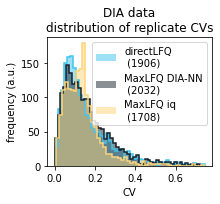

In [17]:
import matplotlib.pyplot as plt
ax = plt.subplot()
ax.figure.set_size_inches(1.25*2.363,2.363)
lfqbenchmark.CVDistributionPlotter(list_of_dataset_cv_infos=[cvinfo_directlfq, cvinfo_diann, cvinfo_iq], ax = ax,cumulative=False, density=False, bins=50, histtype='step')
ax.legend()

ax.set_title("DIA data\ndistribution of replicate CVs")
ax.set_xlabel("CV")
ax.set_ylabel('frequency (a.u.)')

plt.savefig(outfile, bbox_inches='tight', dpi=300)
plt.savefig(outfile.replace(".pdf", ".png"), bbox_inches='tight', dpi=300)